In [4]:
import pandas as pd
from surprise import SVD
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import PredefinedKFold

folds_files = [
    ('ua.base', 'ua.base'),
    ('ua.base', 'ua.test')
]
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_folds(folds_files, reader=reader)
train_res = []
test_res = []
pkf = PredefinedKFold()
lr = [0.0001, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 1]
for l in lr:
    algo = SVD(lr_all=l)
    for trainset, testset in pkf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        ret = accuracy.rmse(predictions, verbose=False)
        if len(train_res) == len(test_res):
            train_res.append(ret)
        else:
            test_res.append(ret)
        print(l)

0.0001
0.0001
0.001
0.001
0.01
0.01
0.02
0.02
0.05
0.05
0.1
0.1
0.2
0.2
1
1


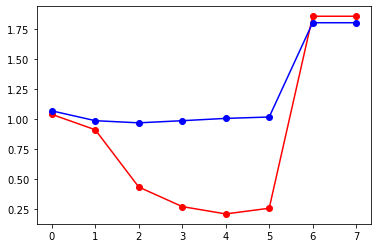

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(len(lr)), train_res, marker='o', color='red') #optimal lerning rate for train is 0.05
plt.plot(range(len(lr)), test_res, marker='o', color='blue') #optimal lerning rate for test is 0.01

In [6]:
folds_files = [
    ('ua.base', 'ua.base'),
    ('ua.base', 'ua.test')
]
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_folds(folds_files, reader=reader)
train_res = []
test_res = []
pkf = PredefinedKFold()
reg = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
for r in reg:
    algo = SVD(reg_all=r)
    for trainset, testset in pkf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        ret = accuracy.rmse(predictions, verbose=False)
        if len(train_res) == len(test_res):
            train_res.append(ret)
        else:
            test_res.append(ret)
        print(r)

0.005
0.005
0.01
0.01
0.02
0.02
0.05
0.05
0.1
0.1
0.2
0.2
0.5
0.5
1
1


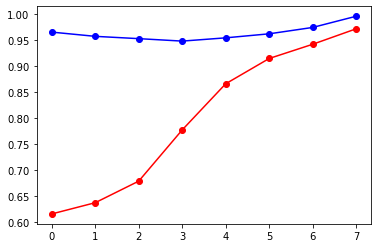

In [7]:
plt.plot(range(len(reg)), train_res, marker='o', color='red') #optimal reg_all for train is 0.005
plt.plot(range(len(reg)), test_res, marker='o', color='blue') #optimal reg_all for test is 0.05

In [5]:
from surprise.model_selection import GridSearchCV
data = Dataset.load_builtin('ml-100k')
param_grid = {'n_epochs': [5, 10, 15, 30], 
              'n_factors': [10, 30, 50, 100],
              'lr_all': [0.002, 0.005, 0.01, 0.02],
              'reg_all': [0.4, 0.6, 0.2, 0.5]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=4)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])#best set {'n_epochs': 30, 'n_factors': 100, 'lr_all': 0.02, 'reg_all': 0.2}

0.9390405412104069
{'n_epochs': 30, 'n_factors': 100, 'lr_all': 0.02, 'reg_all': 0.2}
